<a href="https://colab.research.google.com/github/v03012000/My-original-signature-forged-signature-classifier/blob/master/Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now after sucessfully training the model we want the model to make predictions.

Importing the necessary libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

The wget command is a command line utility for downloading files from the Internet.Download the pkl file from the link which was generated in training part.

In [ ]:
! wget -O 'export.pkl' 'https://drive.google.com/uc?export=download&id=1-9Z9wctEz4tYhEBsE0MC01GeGfPbsLwY'

--2020-07-31 05:59:22--  https://drive.google.com/uc?export=download&id=1-9Z9wctEz4tYhEBsE0MC01GeGfPbsLwY
Resolving drive.google.com (drive.google.com)... 172.217.212.102, 172.217.212.101, 172.217.212.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sgntrlsguqm809bo5nddl3pk29bo6msi/1596175125000/10685616848243078246/*/1-9Z9wctEz4tYhEBsE0MC01GeGfPbsLwY?e=download [following]
--2020-07-31 05:59:25--  https://doc-14-4o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sgntrlsguqm809bo5nddl3pk29bo6msi/1596175125000/10685616848243078246/*/1-9Z9wctEz4tYhEBsE0MC01GeGfPbsLwY?e=download
Resolving doc-14-4o-docs.googleusercontent.com (doc-14-4o-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c05::84
Connecting to doc-14-4o-docs.googleusercontent.com (d

In [ ]:
my_dir="/content"
predictor=load_learner(my_dir)


Predictor function to predict an image

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

Making 2 new directories : test and outputs

saving all the images we want to test in test folder & saving the predicted output in outputs folder

In [ ]:
import os
from PIL import Image
dirr='/content/'
os.makedirs("test",exist_ok=True)
os.makedirs("outputs",exist_ok=True)

Uploading an image which we want to test. 

In [ ]:
%cd "/content/test"
from google.colab import files
my_file=files.upload()
%cd ..

/content/test


Saving 214.jpg to 214.jpg
/content


Checking the prediction of uploaded images

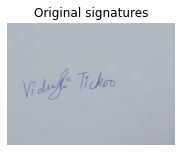

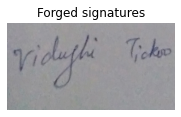

In [ ]:

onlyfiles = next(os.walk('/content/test'))[2]
dirr='/content/test'
for filename in onlyfiles:
  if (filename.endswith('.jpg')):
    path=os.path.join(dirr,filename)
    img=open_image(path)
    t=str(my_predictor(path))
    img.show(title=t)
    #img.save("/content/outputs/"+filename)



Making a video of all the predictions

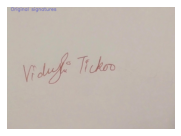

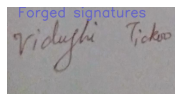

In [ ]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
img_counter=[1]

dirr='/content/test'
onlyfiles = next(os.walk(dirr))[2]
for files in onlyfiles:
  img=cv2.imread('/content/test/'+files)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  org =(50,50) 
  fontScale =2.1
  color = (100,100,200) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA)
  img = Image.fromarray(img, 'RGB')
  
  img.save("/content/outputs/"+str(img_counter[0])+".jpg")
  t=open_image("/content/outputs/"+str(img_counter[0])+".jpg")
  t.show()
  img_counter[0]+=1


saving the video to outputs folder

In [ ]:
%cd '/content/outputs'
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p /content/outputs/my_final_output.mp4
%cd ..

/content/outputs
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --ena

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


creating a public url of video.

In [ ]:

url = upload_public('/content/outputs/my_final_output.mp4')
url

'https://drive.google.com/uc?id=1KNI1-G82Xkc3-hAtbPzNVj5BbTbX8bXw'

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")